In [15]:
from __future__ import print_function, division
from builtins import range


import numpy as np
import matplotlib.pyplot as plt


from sklearn.utils import shuffle

In [16]:
def getData(balance_ones=True):
    # images are 48x48 = 2304 size vectors
    Y = []
    X = []
    first = True
    for line in open('fer2013.csv'):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X) / 255.0, np.array(Y)

    if balance_ones:
        # balance the 1 class
        X0, Y0 = X[Y!=1, :], Y[Y!=1]
        X1 = X[Y==1, :]
        X1 = np.repeat(X1, 9, axis=0)
        X = np.vstack([X0, X1])
        Y = np.concatenate((Y0, [1]*len(X1)))

    return X, Y


In [17]:
def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)


In [18]:
def cost(T, Y):
    return -(T*np.log(Y)).sum()


In [19]:
def y2indicator(y):
    N = len(y)
    K = len(set(y))
    ind = np.zeros((N, K))
    for i in range(N):
        ind[i, y[i]] = 1
    return ind


In [20]:
def error_rate(targets, predictions):
    return np.mean(targets != predictions)




In [52]:

class LogisticModel(object):
    def __init__(self):
        pass

    def fit(self, X, Y, learning_rate=1e-7, reg=0., epochs=50, show_fig=True):
        X, Y = shuffle(X, Y)
        Xvalid, Yvalid = X[-1000:], Y[-1000:]
        Tvalid = y2indicator(Yvalid)
        X, Y = X[:-1000], Y[:-1000]

        N, D = X.shape
        K = len(set(Y))
        T = y2indicator(Y)
        self.W = np.random.randn(D, K) / np.sqrt(D)
        self.b = np.zeros(K)

        costs = []
        best_validation_error = 1
        for i in range(epochs):
            # forward propagation and cost calculation
            pY = self.forward(X)

            # gradient descent step
            self.W -= learning_rate*(X.T.dot(pY - T) + reg*self.W)
            self.b -= learning_rate*((pY - T).sum(axis=0) + reg*self.b)

            if i % 10 == 0:
                pYvalid = self.forward(Xvalid)
                c = cost(Tvalid, pYvalid)
                costs.append(c)
                e = error_rate(Yvalid, np.argmax(pYvalid, axis=1))
                print("i:", i, "cost:", c, "error:", e)
                if e < best_validation_error:
                    best_validation_error = e
        print("best_validation_error:", best_validation_error)

        if show_fig:
            plt.plot(costs)
            plt.show()


    def forward(self, X):
        return softmax(X.dot(self.W) + self.b)

    def predict(self, X):
        pY = self.forward(X)
        return np.argmax(pY, axis=1)

    def score(self, X, Y):
        prediction = self.predict(X)
        return 1 - error_rate(Y, prediction)


    def main():
        X, Y = getData()
        #print("Y",len(Y))

        model = LogisticModel()
        model.fit(X, Y, show_fig=True)
        print(model.score(X, Y))


    

Y 40263
i: 0 cost: 2356.63281544734 error: 0.875
i: 10 cost: 2349.676889561625 error: 0.875
i: 20 cost: 2342.858183290643 error: 0.877
i: 30 cost: 2336.173877713732 error: 0.873
i: 40 cost: 2329.6212003455453 error: 0.872
best_validation_error: 0.872


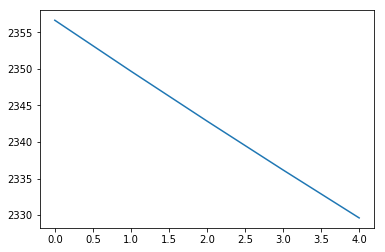

0.12301616869085763


In [53]:
main()